# Depuracion
Actividad supraumbral simulatanea

In [1]:
SCPpath = "/home/isabel/Dropbox/Proyects/Romero-Gutierrez/Scripts/Preprocesamiento/"
cd( SCPpath )
push!( LOAD_PATH, "." ); # folder que continen los modulos. Correr desde ahí dentro.
using AllFunctions # modulo personal
using JLD
Γ = OS( "linux" ); # establecer SO 

In [2]:
filespath = "/home/isabel/Desktop/200819/acido_01/Events/THR_CHS_RAW";
JLDfiles = find_files( filespath, "jld", Γ );

In [3]:
brw_vars = load( "/home/isabel/Desktop/200819/acido_01/Vars/vars.jld" )[ "vars" ];
nchans = size( brw_vars[ "Chs" ], 1 )
thr = 30; # porcentaje de frames activos para ser considerado evento de satura
thr_Frames = Int( floor( nchans*( thr/100 ) ) );
println( "Threshold for overactivation: ", 
        thr, "%", " -> ", thr_Frames, " channels simultaneously activated" );
allMAYBES = load(
    "/home/isabel/Desktop/200819/acido_01/Vars/THR_CHS_RAW_vars.jld"
    )[ "all_MAYBES" ];
BaseMAYBES = allMAYBES;

Threshold for overactivation: 30% -> 1228 channels simultaneously activated


In [8]:
for A = 18:size( JLDfiles, 1 );
    Events = load( JLDfiles[ A ] );
    Vchannel = Events[ "Frames" ];
    if maximum( Vchannel ) >= thr_Frames
        OAF = findall( Vchannel .>= thr_Frames );
        println(
            size( OAF, 1 ),
            " frames are overactive, must be remove the false positives: file ", A );
        else
        OAF = [ ];
        println( "No frames are overactive with the above parameters: file ", A );
    end
    if !isempty( OAF )
        temp = zeros( Int, size( OAF, 1 ) );
        for i = 1:size( OAF, 1 )
            temp[ i ] = Int.( OAF[ i ][ 2 ] );
        end
        FV = Events["Events"];
        allsat = 0;
        for B = 1:size( temp, 1 )
            for C = 1:nchans
                if !isempty(
                        findall(
                            FV[ string( C ) ][ "Fr_Vol" ][ :, 1 ] .== temp[ B ] ) )
                    n_frames = size(
                        findall( 
                            FV[ string( C ) ][ "Fr_Vol" ][ :, 1 ] .== temp[ B ] ), 1 );
                    allMAYBES[ C, A ] = allMAYBES[ C, A ] - n_frames;
                    allsat = allsat + n_frames;
                end
            end
        end
        println( allsat," events removed." );
    end
end
DepMAYBES = allMAYBES;

1 frames are overactive, must be remove the false positives: file 18
No frames are overactive with the above parameters: file 19
No frames are overactive with the above parameters: file 20
No frames are overactive with the above parameters: file 21
No frames are overactive with the above parameters: file 22
No frames are overactive with the above parameters: file 23
No frames are overactive with the above parameters: file 24
No frames are overactive with the above parameters: file 25
No frames are overactive with the above parameters: file 26
No frames are overactive with the above parameters: file 27
No frames are overactive with the above parameters: file 28
No frames are overactive with the above parameters: file 29
No frames are overactive with the above parameters: file 30
No frames are overactive with the above parameters: file 31
No frames are overactive with the above parameters: file 32
No frames are overactive with the above parameters: file 33
No frames are overactive with t

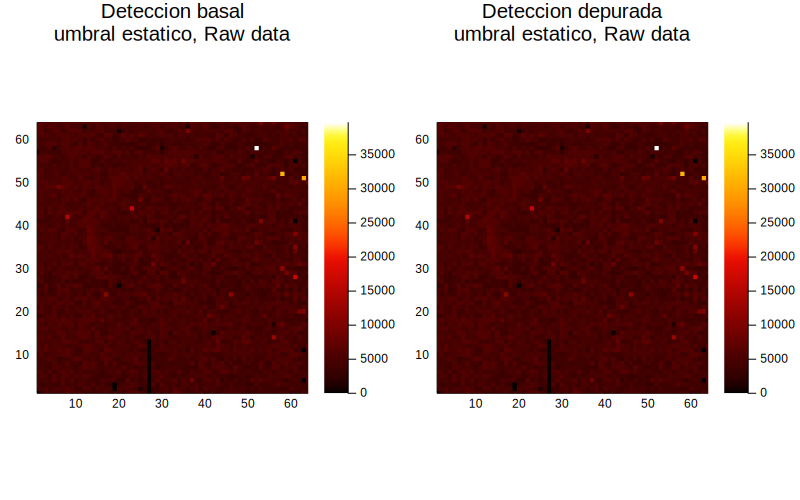

In [60]:
using Plots

x = collect(1:sqrt(nchans));
y = collect(1:sqrt(nchans));

z = (sum( BaseMAYBES, dims = 2 ));
plot1 = heatmap( x, y, z, 
    grid = false, 
    aspect_ratio = 1, 
    fillcolor = :juno_grad,
    title = "Deteccion basal
    umbral estatico, Raw data",
    colorbar = true,
    background_colour = :white,
    framestyle = :axes,
    xlimits = (1,64),
    ylimits = (1,64),
    );

z = (sum( DepMAYBES, dims = 2 ));
plot2 = heatmap( x, y, z, 
    grid = false, 
    aspect_ratio = 1, 
    fillcolor = :juno_grad,
    title = "Deteccion depurada
    umbral estatico, Raw data",
    leg = false,
    colorbar = true,
    background_colour = :white,
    framestyle = :axes,
    xlimits = (1,64),
    ylimits = (1,64),
    );
gr( size = ( 800, 500 ) )
plot( plot1, plot2,
    layout = ( 1, 2 ),
)


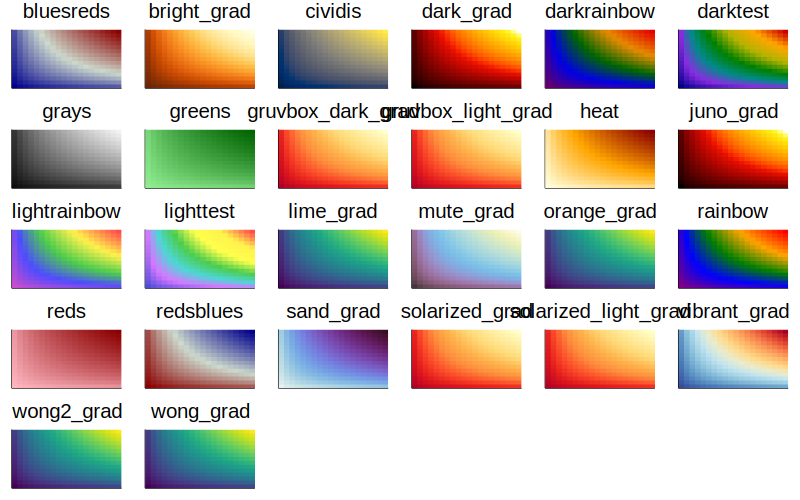

In [54]:
clibraries()

#showlibrary(:Plots)
#showlibrary(:cmocean)
showlibrary(:misc)
#showlibrary(:colorcet)
#showlibrary(:colorbrewer)